# Data Analysis on iris dataset

In [2]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load and Explore Dataset

### Findings:

* The dataset contains 150 rows and 6 columns.

* It includes 4 numerical variables (sepal length, sepal width, petal length, petal width), 1 categorical variable (species), and a numeric target code (0, 1, 2).

* There are no missing values — meaning the dataset is clean and ready for analysis.

In [6]:
# -------------------------------
# Load and Explore Dataset
# -------------------------------

try:
    # Load Iris dataset from sklearn
    iris = load_iris(as_frame=True)
    df = iris.frame  # Convert to pandas DataFrame
    df["species"] = iris.target_names[iris.target]  # Add species column

except FileNotFoundError:
    print("Error: Dataset file not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [8]:
# Display first rows
print("First 5 rows of dataset:")
df.head()

First 5 rows of dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
# Data types and missing values
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [12]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

# Basic Data Analysis

### Findings:

* Sepal length ranges from 4.3 cm to 7.9 cm.

* Sepal width ranges from 2.0 cm to 4.4 cm, with less variation compared to petals.

* Petal length and width show the most variation and provide clear separation among species.

* Setosa has the smallest petal measurements, Virginica the largest, while Versicolor falls in between.

* This suggests petal dimensions are stronger features for classification than sepal dimensions.

In [14]:
# Summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
# Group by species and compute mean of numerical columns
grouped = df.groupby("species").mean()
print("\nMean values by species:")
grouped


Mean values by species:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


### Insights:

* Setosa has the smallest petals (mean petal length = 1.46 cm, petal width = 0.25 cm) and the widest sepals (mean sepal width =  3.43 cm).

* Versicolor shows medium-sized petals (mean petal length =  4.26 cm) and narrower sepals compared to Setosa.

* Virginica has the largest petals (mean petal length = 5.55 cm, petal width = 2.03 cm) and also the longest sepals.

* The target column (0, 1, 2) is simply the numerical encoding of the species labels: Setosa (0), Versicolor (1), and Virginica (2).

👉 This confirms that petal length and width are the most distinctive features that separate the species, while sepal measurements overlap more.

# Data Visualization

## Line Chart – Sepal Length

### Findings:

* Sepal length values fluctuate between 4.3 cm and 7.9 cm across the dataset index.

* This highlights the natural diversity of flower sizes but does not follow a “time trend” since the dataset is not time-series.

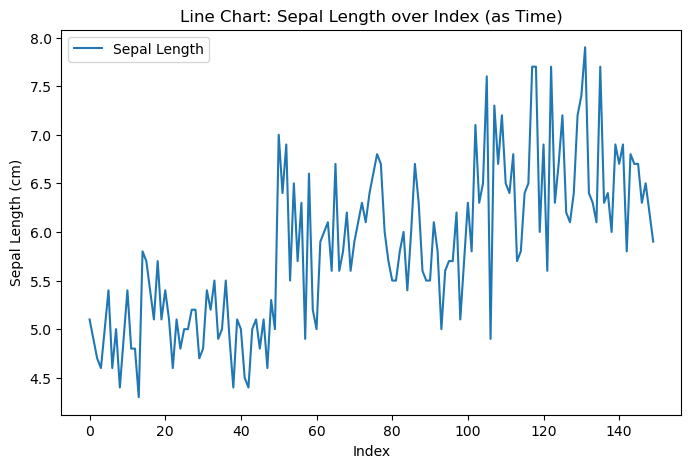

In [20]:

#Line Chart – simulate time-series trend by index (e.g., sepal length over dataset order)
plt.figure(figsize=(8,5))
plt.plot(df.index, df["sepal length (cm)"], label="Sepal Length")
plt.title("Line Chart: Sepal Length over Index (as Time)")
plt.xlabel("Index")
plt.ylabel("Sepal Length (cm)")
plt.legend()
plt.show()


## Bar Chart – Average Petal Length per Species

### Findings:

* Setosa: smallest average petal length (1.5 cm).

* Versicolor: moderate average (4.3 cm).

* Virginica: largest average (5.5 cm).

* Petal length is a key distinguishing factor between species.

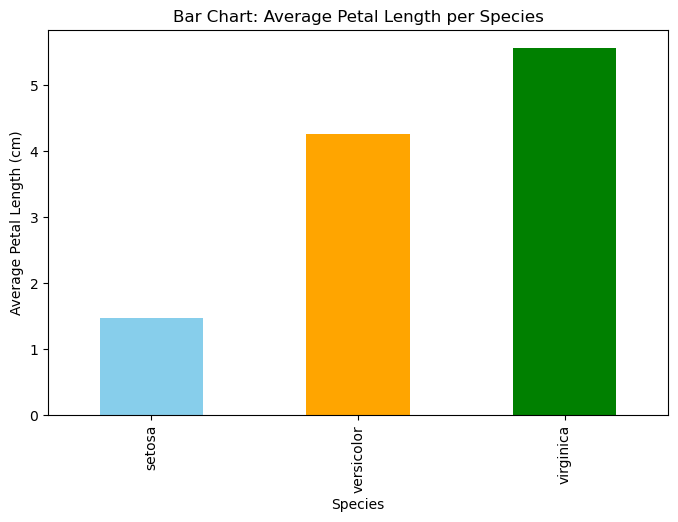

In [22]:
# Bar Chart – Average petal length per species
plt.figure(figsize=(8,5))
grouped["petal length (cm)"].plot(kind="bar", color=["skyblue","orange","green"])
plt.title("Bar Chart: Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()

## Histogram – Sepal Width

### Findings:

* Most flowers have sepal width between 2.5 cm and 3.5 cm.

* Very few samples lie outside this range (< 2.3 cm or > 4.0 cm).

* Sepal width is less variable and it follow a normal distribution with no outliers.

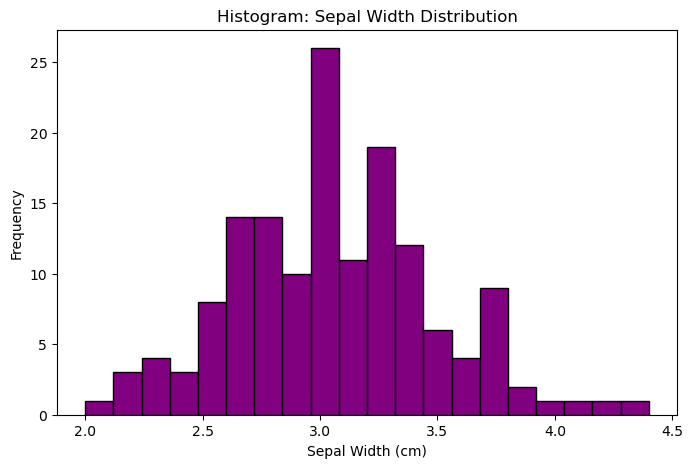

In [24]:
# 3. Histogram – Distribution of sepal width
plt.figure(figsize=(8,5))
plt.hist(df["sepal width (cm)"], bins=20, color="purple", edgecolor="black")
plt.title("Histogram: Sepal Width Distribution")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

## Scatter Plot – Sepal Length vs Petal Length

### Findings:

* Setosa points cluster at the lower end (short sepal & petal lengths).

* Virginica points cluster at the higher end (long sepal & petal lengths).

* Versicolor sits in between but overlaps slightly with Virginica.

* Confirms that petal length and sepal length are effective for species separation.

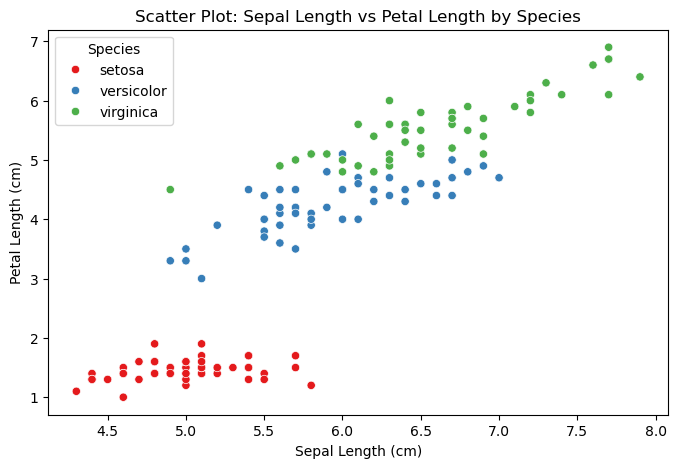

In [26]:
# 4. Scatter Plot – Sepal length vs Petal length
plt.figure(figsize=(8,5))
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="species", data=df, palette="Set1")
plt.title("Scatter Plot: Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()

# 🟢 Final Conclusion

* The dataset is well-structured and clean (no missing values).

* Petal dimensions (length & width) are the strongest features for classifying species.

* Setosa is clearly separable due to its small petal size, while Versicolor and Virginica overlap slightly but remain distinguishable.

* Sepal measurements provide some information but are less powerful compared to petals.